<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/2%20Advanced/065Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 065 Voronoi

[Voronoiの紹介スライド](https://github.com/vitroid/PythonTutorials/blob/master/2%20Advanced/Voronoi.pdf?raw=true) (In Japanese)


In [1]:
# Locations of the prefectural capitals of Japan
# https://www.benricho.org/chimei/latlng_data.html

import numpy as np
pos = np.fromstring("""
43.06417	141.34694
40.82444	140.74
39.70361	141.1525
38.26889	140.87194
39.71861	140.1025
38.24056	140.36333
37.75	140.46778
36.34139	140.44667
36.56583	139.88361
36.39111	139.06083
35.85694	139.64889
35.60472	140.12333
35.68944	139.69167
35.44778	139.6425
37.90222	139.02361
36.69528	137.21139
36.59444	136.62556
36.06528	136.22194
35.66389	138.56833
36.65139	138.18111
35.39111	136.72222
34.97694	138.38306
35.18028	136.90667
34.73028	136.50861
35.00444	135.86833
35.02139	135.75556
34.68639	135.52
34.69139	135.18306
34.68528	135.83278
34.22611	135.1675
35.50361	134.23833
35.47222	133.05056
34.66167	133.935
34.39639	132.45944
34.18583	131.47139
34.06583	134.55944
34.34028	134.04333
33.84167	132.76611
33.55972	133.53111
33.60639	130.41806
33.24944	130.29889
32.74472	129.87361
32.78972	130.74167
33.23806	131.6125
31.91111	131.42389
31.56028	130.55806
26.2125	127.68111
""", sep=" ").reshape(-1,2)[:,::-1]
# Split the data by spaces,
# read as an array of numbers,
# convert it to a 2D-array,
# and exchange the two columns.

pos

array([[141.34694,  43.06417],
       [140.74   ,  40.82444],
       [141.1525 ,  39.70361],
       [140.87194,  38.26889],
       [140.1025 ,  39.71861],
       [140.36333,  38.24056],
       [140.46778,  37.75   ],
       [140.44667,  36.34139],
       [139.88361,  36.56583],
       [139.06083,  36.39111],
       [139.64889,  35.85694],
       [140.12333,  35.60472],
       [139.69167,  35.68944],
       [139.6425 ,  35.44778],
       [139.02361,  37.90222],
       [137.21139,  36.69528],
       [136.62556,  36.59444],
       [136.22194,  36.06528],
       [138.56833,  35.66389],
       [138.18111,  36.65139],
       [136.72222,  35.39111],
       [138.38306,  34.97694],
       [136.90667,  35.18028],
       [136.50861,  34.73028],
       [135.86833,  35.00444],
       [135.75556,  35.02139],
       [135.52   ,  34.68639],
       [135.18306,  34.69139],
       [135.83278,  34.68528],
       [135.1675 ,  34.22611],
       [134.23833,  35.50361],
       [133.05056,  35.47222],
       [

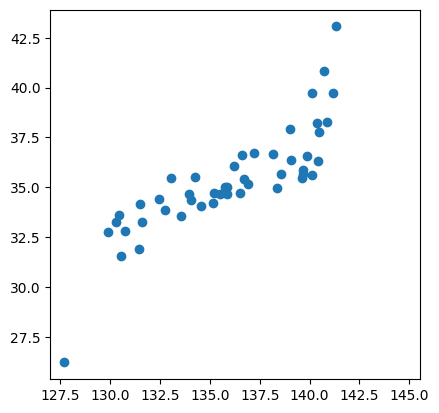

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = plt.axes()

plt.scatter(pos[:,0], pos[:,1])
plt.axis("square")
plt.show()

県庁所在地をつないだDelaunay図

Delaunay diagram by connecting nearby capitals.

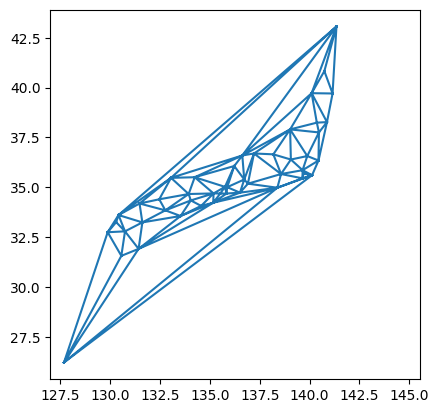

In [3]:
# Delaunay triangulation
from scipy.spatial import Delaunay
tri = Delaunay(pos)
plt.triplot(pos[:,0], pos[:,1], tri.simplices)
plt.axis("square")
plt.show()

2次元のボロノイ図を描くのはライブラリにまかせる。

The smart library can even make the Voronoi diagram from the locations of the prefectural capitals.

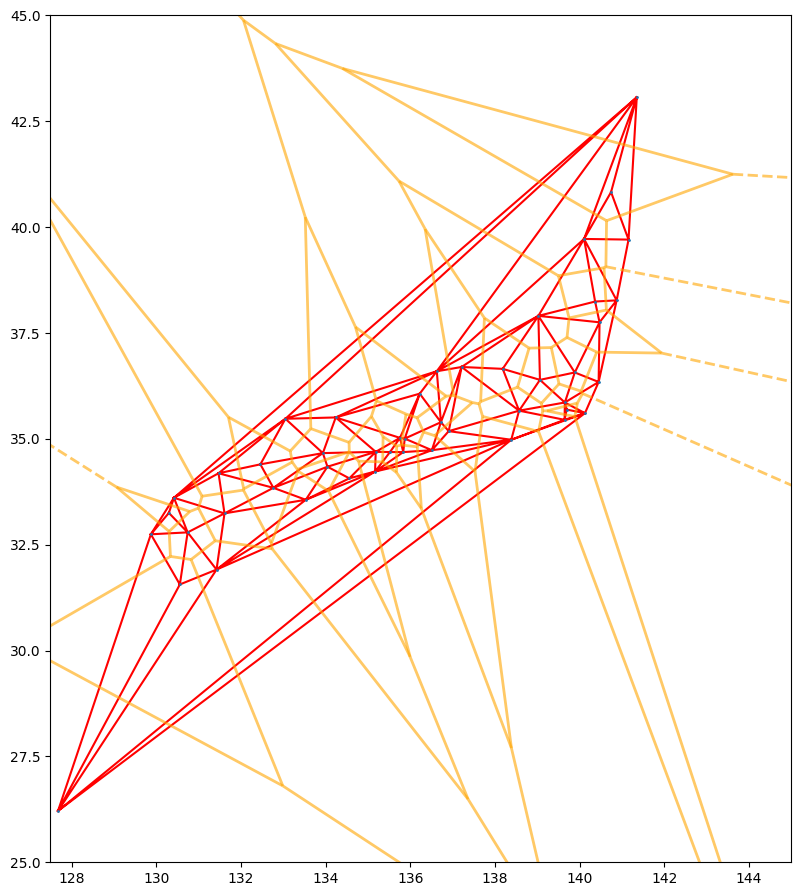

In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.voronoi_plot_2d.html
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(pos)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=2)
plt.triplot(pos[:,0], pos[:,1], tri.simplices, c='red')
#plt.xlim(127.5,145)
plt.ylim(25, 45)
plt.axis([127.5, 145, 25, 45])
plt.gca().set_aspect('equal', adjustable='box')
fig.set_size_inches(11,11)
plt.show()

歪んで見えるのは、縦と横の目盛が違うから。

境界線をより正確に描くためには、球面幾何学に準じた非ユークリッドVoronoi分割を適用する必要がある。(二等分線が大円になる)

In order to draw the boundary more accurately, it is necessary to apply a non-Euclidean Voronoi division according to spherical geometry. (The bisectors become geodesics.)


もうちょっと少ない点で。例えば4点の場合。

Another example with fewer points.

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = np.array([[0, -0.1], [0, 1.1], [1.2, 0], [1, 1]])
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=2)
plt.gca().set_aspect('equal', adjustable='box')
fig.set_size_inches(8,8)
plt.show()

vorにはどんな情報が含まれているか。

What is contained in the variable `vor`?

In [ ]:
vor.__dict__

_pointsが与えた点(4つ)、verticeがvoronoi頂点(外接円の中心)のようだ。よく見ると、辺の情報も含まれている。

 3次元でも4次元でもscipy.spatial.Voronoiを使えばVoronoi分割できるが、残念なことに、既存の関数を使って可視化できるのは2次元まで。

`_points` would correspond to the given points, `vertices` are the voronoi vertices (a voronoi vertex  is the center of a circumlscribed circle.) Edge information is also included.

 別の例。ひまわりの種の配列。

 An another example： Mimic the sequence of sunflower seeds.

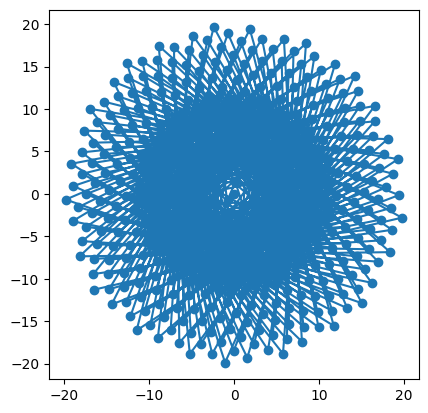

In [6]:
import numpy as np
from matplotlib import pyplot as plt

tau  = (5**0.5-1)/2 # Golden ratio
A    = 2*np.pi / tau   # Golden angle

# Place 400 points on a spiral line.
# Place points at a fixed angular interval.
# As the radius increases, the distance between
# two consecutive points increases and the area
# occupied by a single species becomes larger.
# To compensate for this tendency, the radius of
# the helix is chosen to be proportional to the
# square root of the order number of the points.
angles = np.array([A*i for i in range(400)])
radii  = np.array([i**0.5 for i in range(400)])

x = radii * np.cos(angles)
y = radii * np.sin(angles)

# plt.plot(x,y, '-')
plt.scatter(x,y)
plt.axis('square')
plt.show()

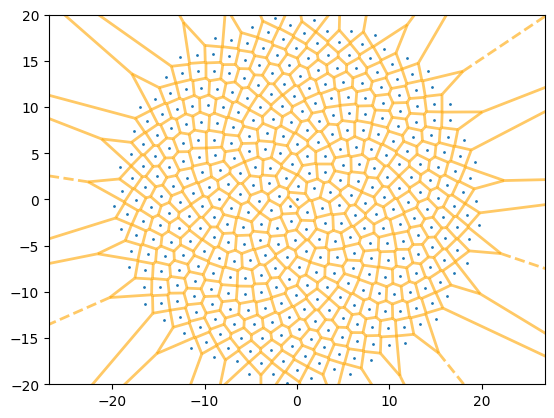

In [7]:
pos = np.vstack([x,y]).T

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.voronoi_plot_2d.html
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(pos)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=2)
plt.axis('equal')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

# Delaunay分割を利用した補間


In [ ]:
from scipy.spatial import Delaunay
import numpy as np

# 郵便局の場所。4つだけ。
points = np.array([[0, -0.1], [0, 1.1], [1.2, 0], [1, 1]])

# いきなりDelaunay三角形分割
tri = Delaunay(points)
tri


`tri`の中身を見る。


In [ ]:
tri.__dict__


三角形を描く。


In [ ]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.scatter(points[:,0], points[:,1], s=100)
plt.axis('square')
plt.show()


外接円の半径と中心は?


In [ ]:
import numpy as np
def plane(p1,p2,p3):
    "p1,p2,p3を通る平面z=ax+by+cの係数a,b,cを返す"
    x1,y1,z1 = p1
    x2,y2,z2 = p2
    x3,y3,z3 = p3
    A = np.array([[x1,y1,1],[x2,y2,1],[x3,y3,1]])
    X = np.array([z1,z2,z3])
    # Aの逆行列とXのドット積
    abc = np.linalg.inv(A) @ X
    return abc

def center_and_radius(a,b,c):
    "平面z=ax+by+cと放物面z=x**2+y**2の交線のxy平面への射影"
    radius = (a**2 + b**2 + 4*c)**0.5/2
    center = (a/2, b/2)
    return center, radius

# tripletは最初のDelaunay三角形の3つの頂点の番号
triplet = tri.simplices[0]
# p3は3つの頂点の座標(x,y)
p3 = points[triplet]
# 放物面にもちあげたz座標をくっつけ、plane()関数にわたす。
a,b,c = plane([p3[0,0], p3[0,1], p3[0,0]**2+p3[0,1]**2],
            [p3[1,0], p3[1,1], p3[1,0]**2+p3[1,1]**2],
            [p3[2,0], p3[2,1], p3[2,0]**2+p3[2,1]**2])
center, radius = center_and_radius(a,b,c)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.scatter(points[:,0], points[:,1], s=100)

circle1 = plt.Circle(center, radius, color='r', fill=False)
plt.scatter(center[0], center[1])
plt.gca().add_patch(circle1)

plt.axis('square')
plt.show()



外接円を全部まとめて描く。


In [ ]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.scatter(points[:,0], points[:,1], s=100)

# tripletは最初のDelaunay三角形の3つの頂点の番号
for triplet in tri.simplices:
    # p3は3つの頂点の座標(x,y)
    p3 = points[triplet]
    # 放物面にもちあげたz座標をくっつけ、plane()関数にわたす。
    a,b,c = plane([p3[0,0], p3[0,1], p3[0,0]**2+p3[0,1]**2],
                [p3[1,0], p3[1,1], p3[1,0]**2+p3[1,1]**2],
                [p3[2,0], p3[2,1], p3[2,0]**2+p3[2,1]**2])
    center, radius = center_and_radius(a,b,c)

    # add a circumcircle
    circle1 = plt.Circle(center, radius, color='r', fill=False)
    plt.gca().add_patch(circle1)
    # center dot
    plt.scatter(center[0], center[1])

plt.axis('square')
plt.show()



てきとうに選んだ3つの家`(0.1, 0.2), (1.5, 0.5), (0.5, 1.05)`が、どちらの郵便局のテリトリー内(三角形の中)にあるかを判定する。


In [ ]:
vertices = np.array([(0.1, 0.2), (1.5, 0.5), (0.5, 1.05)])
tri.find_simplex(vertices)


最初と最後の点は三角形1の中にあり、2番目の点はどの三角にも属していない。

三角形1の中で、3つの点がどんな位置にあるか(混合比)を求める。(詳細は理解していません。transformって何?)


In [ ]:
# 以下のリンク先を参考にしました。
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html

# b = tri.transform[1,:2].dot(np.transpose(p - tri.transform[1,2]))
b = tri.transform[1,:2] @  (points - tri.transform[1,2]).T
np.c_[b.T, 1 - b.sum(axis=0)]


1行目は、混合比が全部0以上1以下、つまり三角形1の内部にある。
2行目は負の数や1を越える数があり、三角形1の外の点である。
3行目は成分が0の項があるので、点は三角形の辺の上にある。

理解していないtransformに頼るのではなく、自力で混合比を求めてみる。

三角形OABの中の点Cの内挿は、$OA=a, OB=b, OC=c,$と書き、$pa+qb=c$となる係数$p,q$を求めることにほかならない。成分で書けば、
$$(p,q)\left(\begin{matrix}a_x, a_y\\ b_x,b_y\end{matrix}\right)=(c_x, c_y)$$
書きかえれば、
$$(p,q)=(c_x, c_y)\left(\begin{matrix}a_x, a_y\\ b_x,b_y\end{matrix}\right)^{-1}$$
これをPython化するとこんな感じになる。


In [ ]:
def interpolate(point, triangle):
    # last point is the origin
    o = triangle[2]
    ab = triangle[:2] - o
    print(ab)
    c = point - o
    p, q = np.linalg.inv(ab) @ c
    r = 1 - p - q
    return p, q, r


for point in points:
    p, q, r = interpolate(point, tri.simplices[0])
    print(p, q, r)








4つの頂点に、色をあてはめ、それ以外の点はその4色の混合で表す。


In [ ]:
colors = np.array([[1,0,0],
                   [0.5,1,0],
                   [0,1,1],
                   [0.5,0,1]])

import matplotlib.pyplot as plt
plt.scatter(points[:,0], points[:,1], c=colors, s=100)

plt.axis('square')
plt.show()


In [ ]:
# 0.1間隔で
p = []
for ix in range(13):
    for iy in range(11):
        x, y = ix/10, iy/10
        p = np.array([[x, y]])
        # 点がどっちの三角形に属するか。
        which = tri.find_simplex(p)[0]
        # どの三角にも属しない場合は飛ばす。
        if which < 0:
            continue
        # 混合比
        b = tri.transform[which,:2] @ (p - tri.transform[which,2]).T
        mix = np.c_[b.T, 1 - b.sum(axis=0)][0]
        # その三角形を構成する頂点の番号を割りだす。
        v = tri.simplices[which]
        #
        # その比率で、頂点の色を混ぜる。
        # mixedcolor = mix[0]*colors[v[0]] + mix[1]*colors[v[1]] + mix[2]*colors[v[2]]
        # simpler expression
        mixedcolor = mix @ colors[v]
        mixedcolor = np.around(mixedcolor, decimals=4)
        plt.scatter(x, y, s=50, facecolor=mixedcolor)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.scatter(points[:,0], points[:,1], s=100, facecolor=colors)
plt.show()


## これは何に使えるの?

スライドでも紹介した通り、Voronoi分割のアイディアは、情報を幾何学的に扱ういろんなところに顔を出します。また、2次元の情報の処理のために、一旦三次元に持ちあげて考える、というのも非常に面白い視点だと思います。

* データの補間
* データの分類と最適化
* データの可視化

など。アイディアは4次元以上のデータでも使えるはずで、機械学習の手法としても面白いと思います。


# 課題

岡山市内の郵便局のテリトリーを可視化してみましょう。





## 地図

地図の外形データは、国土地理院が提供しています。


In [ ]:
# 国土地理院から地形データ(行政区域の輪郭線)を入手 (この例は神奈川県)
! wget https://nlftp.mlit.go.jp/ksj/gml/data/N03/N03-2021/N03-20210101_14_GML.zip
! unzip N03-20210101_14_GML.zip

--2022-06-15 04:11:57--  https://nlftp.mlit.go.jp/ksj/gml/data/N03/N03-2021/N03-20210101_14_GML.zip
Resolving nlftp.mlit.go.jp (nlftp.mlit.go.jp)... 147.154.45.210, 130.35.103.62, 147.154.8.35
Connecting to nlftp.mlit.go.jp (nlftp.mlit.go.jp)|147.154.45.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6590028 (6.3M) [application/zip]
Saving to: ‘N03-20210101_14_GML.zip’

N03-20210101_14_GML 100%[===================>]   6.28M  7.16MB/s    in 0.9s    

2022-06-15 04:11:59 (7.16 MB/s) - ‘N03-20210101_14_GML.zip’ saved [6590028/6590028]

Archive:  N03-20210101_14_GML.zip
  inflating: N03-20210101_14_GML/KS-META-N03-21_14_210101.xml  
  inflating: N03-20210101_14_GML/N03-21_14_210101.dbf  
  inflating: N03-20210101_14_GML/N03-21_14_210101.geojson  
  inflating: N03-20210101_14_GML/N03-21_14_210101.prj  
  inflating: N03-20210101_14_GML/N03-21_14_210101.shp  
  inflating: N03-20210101_14_GML/N03-21_14_210101.shx  
  inflating: N03-20210101_14_GML/N03-21_14_210101

In [ ]:
# shapeデータの解析のためのライブラリをcolabにインストール
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 6.3 MB 50.7 MB/s 
     |████████████████████████████████| 16.7 MB 330 kB/s 


In [ ]:
# shapeデータの読みこみ
import geopandas as gpd
import matplotlib.pyplot as plt

path_shp = "./N03-20210101_14_GML/N03-21_14_210101.shp"
gdf = gpd.read_file(path_shp)
gdf.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,神奈川県,None,横浜市,鶴見区,14101,"POLYGON ((139.67603 35.45629, 139.67587 35.455..."
1,神奈川県,None,横浜市,鶴見区,14101,"POLYGON ((139.67703 35.45814, 139.67676 35.457..."
2,神奈川県,None,横浜市,鶴見区,14101,"POLYGON ((139.69475 35.46528, 139.69483 35.464..."
3,神奈川県,None,横浜市,鶴見区,14101,"POLYGON ((139.70706 35.47232, 139.70710 35.472..."
4,神奈川県,None,横浜市,鶴見区,14101,"POLYGON ((139.71108 35.48560, 139.71114 35.485..."


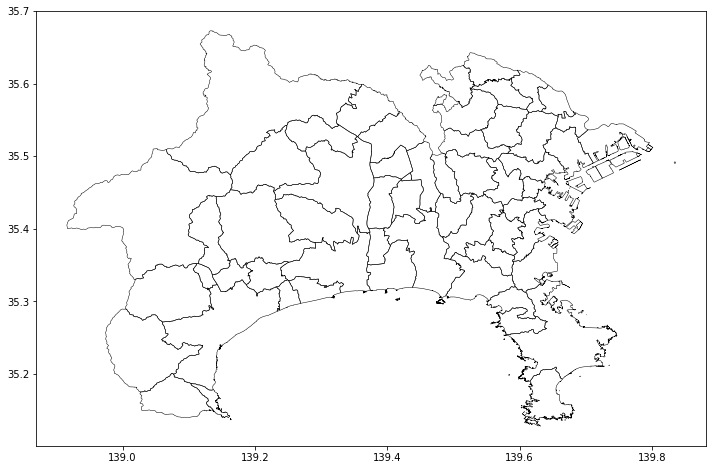

In [ ]:
f = plt.figure(figsize=(12, 8))
a = f.gca()
for region in gdf.iloc:
    a.plot(*region.geometry.exterior.xy, "k", linewidth=0.5)

## 郵便局の位置

郵便局の座標情報は国土地理院が提供しています。

https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-P30.html

岡山の郵便局の情報のURLは?

https://nlftp.mlit.go.jp//ksj/gml/data/P30/P30-13/P30-13_33.zip

のようです。

座標データを解読するには? (つづく)

## 注意

日本赤道よりもけっこう北にあるので、経度と緯度の1度の大きさが同じではありません。そのため、正確にテリトリーを描くためには、経度と緯度の縮尺が同じになるように調整する必要があります。